# Motivation behind this project

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

As a data anaylst our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### This project has been divided in the following parts:
* Know the data
* Make data right for the model
* Model building and evaluation
* Recommendations

## Part I: Know the data
In this part we will try to understand the data better

In [125]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
#reading and displaying the data set provided.
country_data_df = pd.read_csv('Country-data.csv')
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [127]:
country_data_df.info()  #to know about data types of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


To supply data to the model, we need numeric values and here we have numeric values only. It is a great news. In further steps we can avoid dummy variable creation and encoding.

One more good news is there is no null values in the data set given.

#### Statistical description of the data

In [128]:
country_data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can clearly see there is a huge variation in the mean among the columns and hence we should be doing the scaling in later steps.

#### Let's try to find if there are any repeated/duplicate rows.
Since the data is distributed based on countries so we should find if there is any country repeated.

In [129]:
country_data_df.country.value_counts()

Norway                      1
Bulgaria                    1
Cote d'Ivoire               1
Netherlands                 1
Cameroon                    1
Georgia                     1
Ukraine                     1
Thailand                    1
Burkina Faso                1
Switzerland                 1
Comoros                     1
Grenada                     1
Suriname                    1
Australia                   1
Kenya                       1
Peru                        1
Uganda                      1
Germany                     1
Samoa                       1
Sudan                       1
Macedonia, FYR              1
Tonga                       1
Azerbaijan                  1
Tajikistan                  1
Lebanon                     1
Kyrgyz Republic             1
Mozambique                  1
Estonia                     1
Sweden                      1
Indonesia                   1
                           ..
Colombia                    1
Israel                      1
Jamaica   

So each country the count is one. So there is no duplicate values

### Some EDA now

Text(0.5, 1, 'Pairwise relation of the columns')

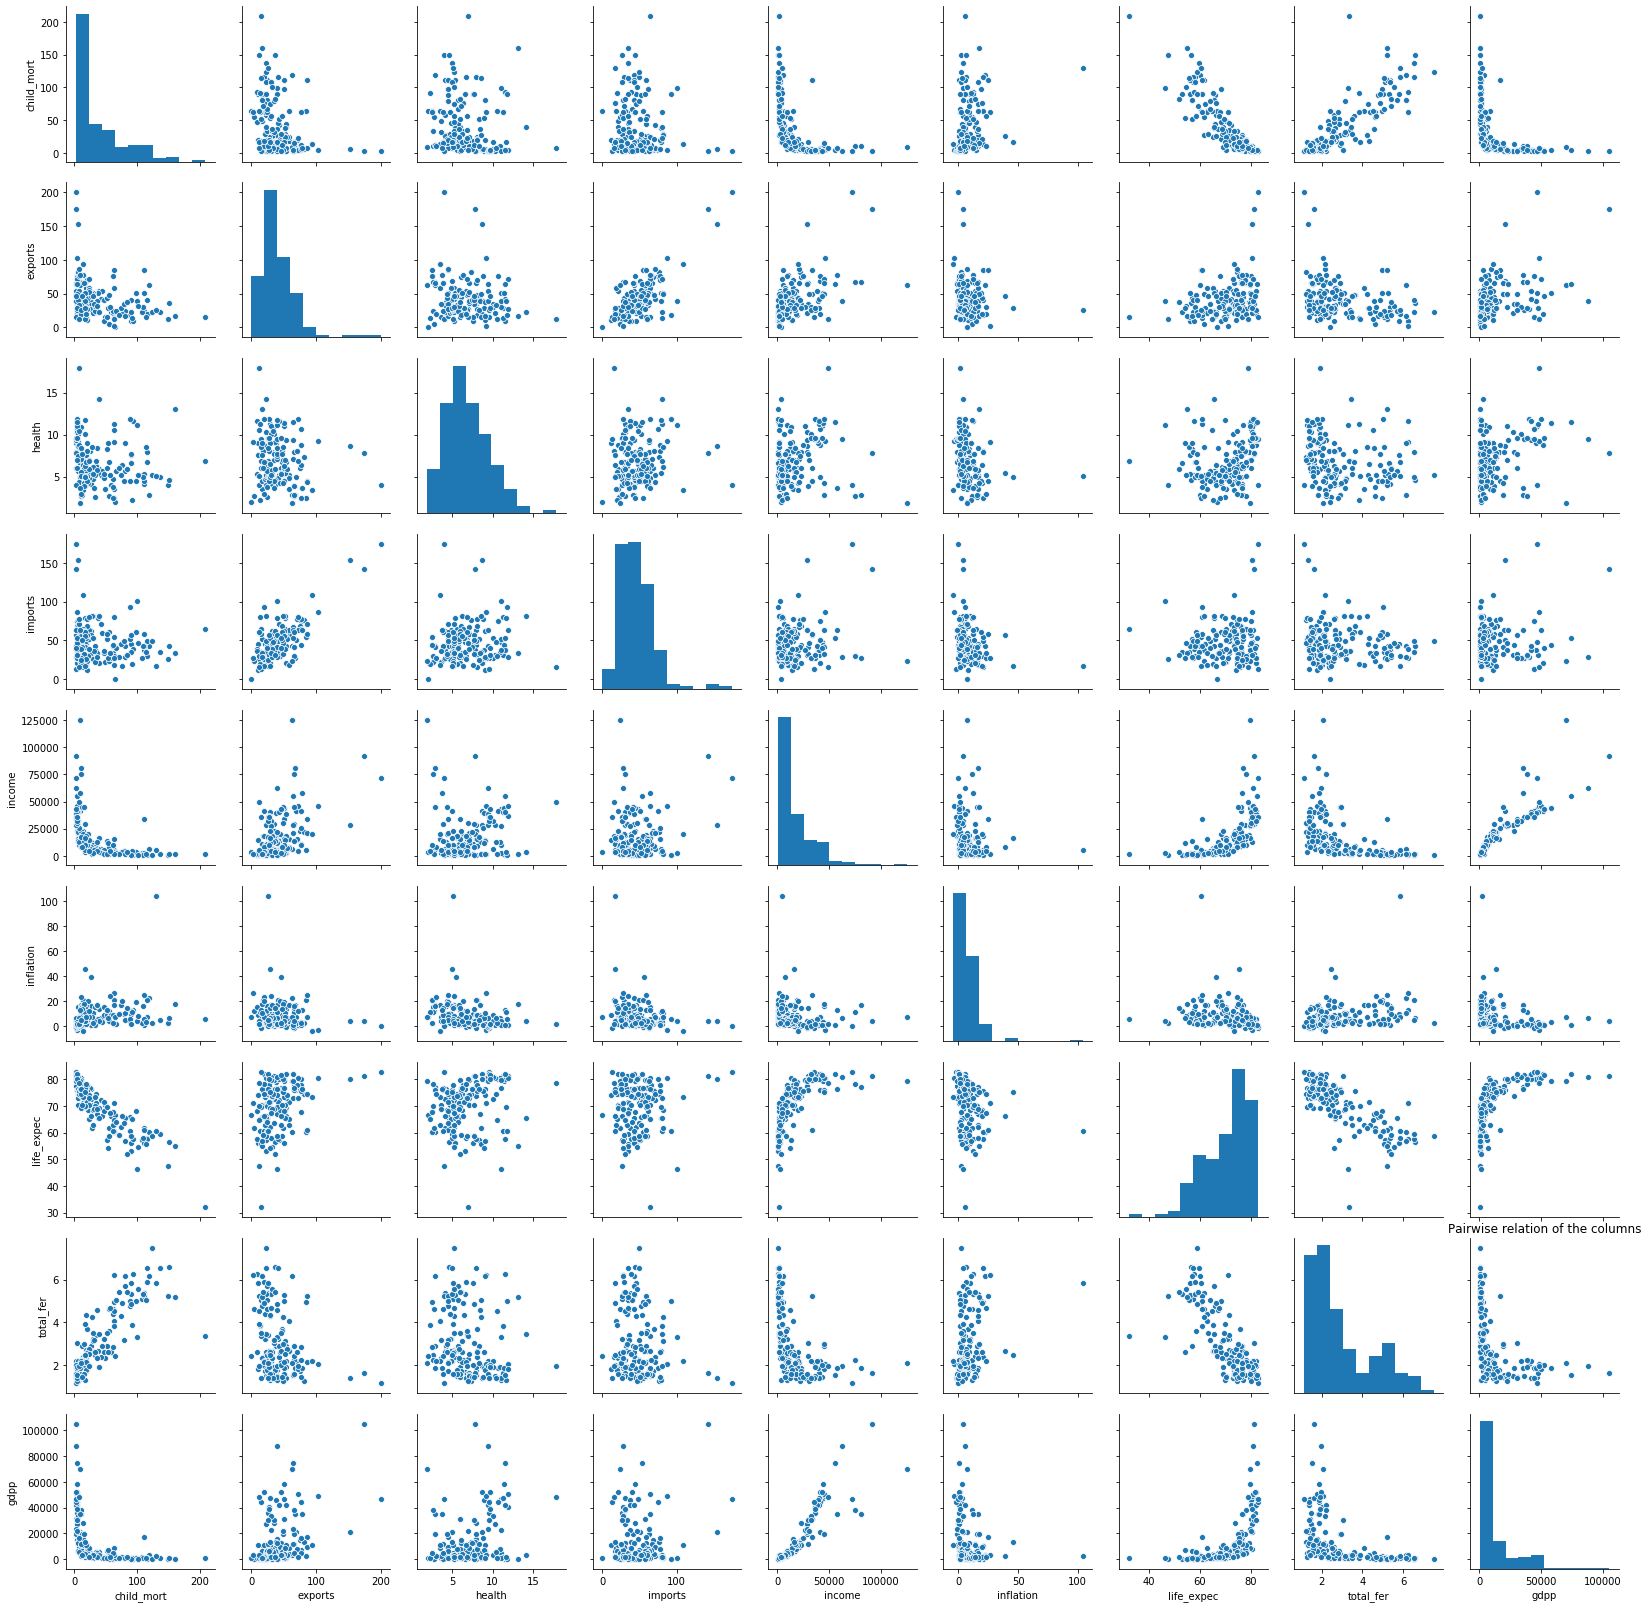

In [130]:
#### Check the relation between different variables of the data set by plotting a pair plot.
sns.pairplot(country_data_df)
plt.title("Pairwise relation of the columns")

### Inference:
* GDP per capita is dependent on the income of people of the country.
* Life expectancy is more in the countries with high GDP.
* Life expectancy is inversely proportional to the child mortality rate and total fer
* How import and export varies with income and GDP can be understood by the plot.

In [131]:
#First let's get the dataframe with numerical columns
cols = country_data_df.select_dtypes(include=['int64','float64','int32','float32',]).columns
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Now let's figure out the top 10 countries for each attribute.

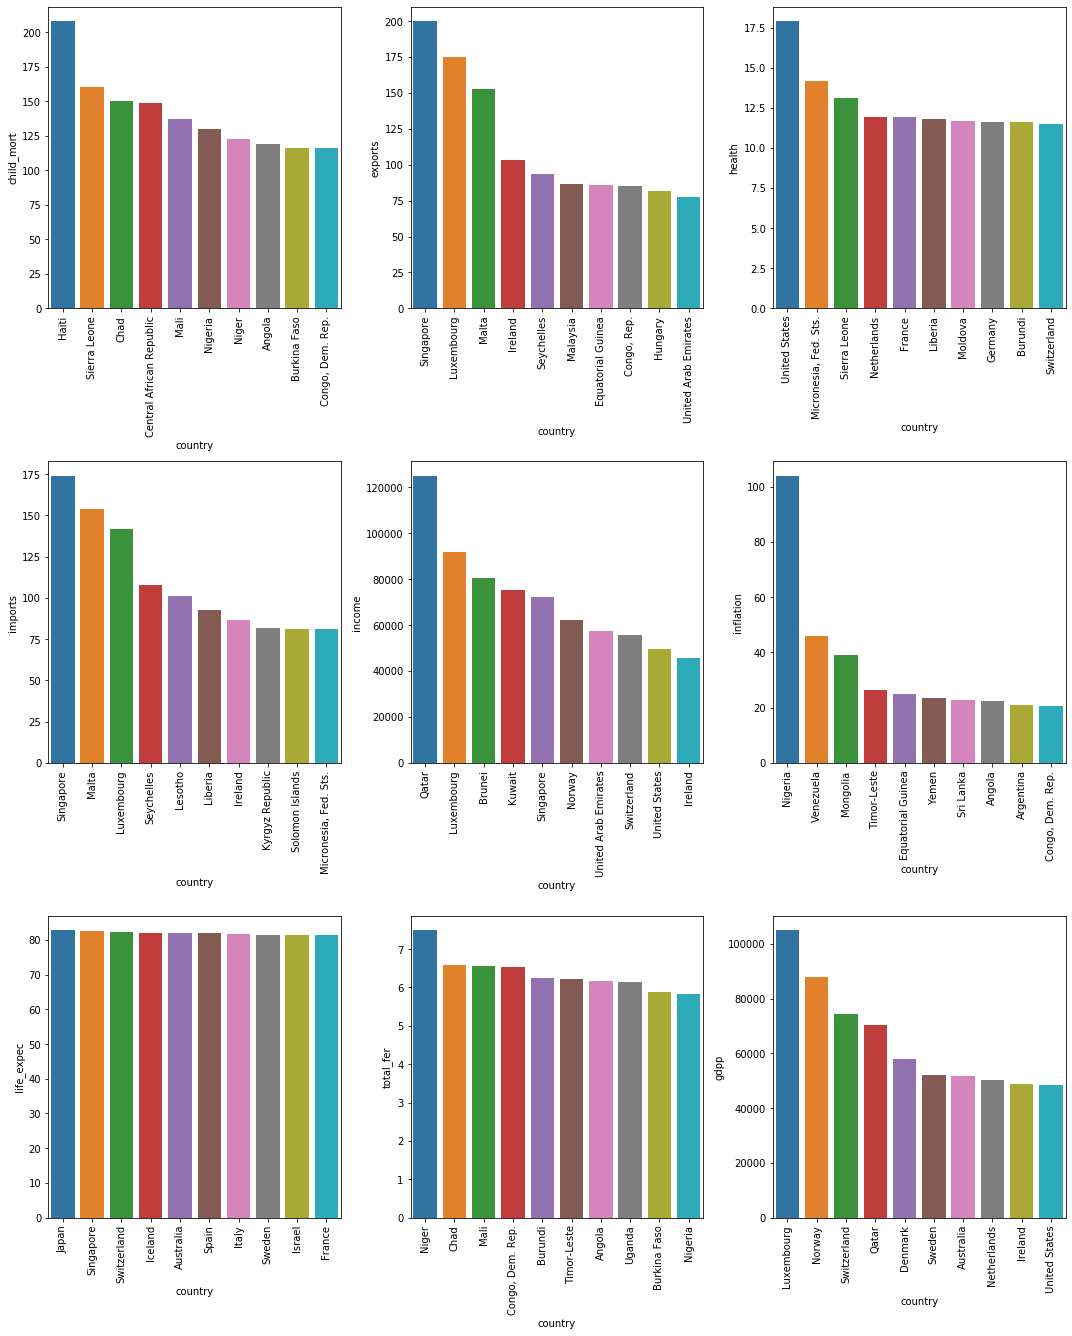

In [132]:

plt.figure(figsize=(15,55))
i=0
for val in cols:
    i = i+1
    plt.subplot(9,3,i)
    #bot5 = country_data_df[['country',val]].sort_values(val, ascending = True).head(5)
    top10 = country_data_df[['country',val]].sort_values(val, ascending = False).head(10)
    sns.barplot(x='country', y=val, data= top10)
    plt.xticks(rotation=90)
    #sns.barplot(x='country', y=val, data= bot5)
plt.tight_layout()

### Now we will see the bottom 10 countries for each attribute

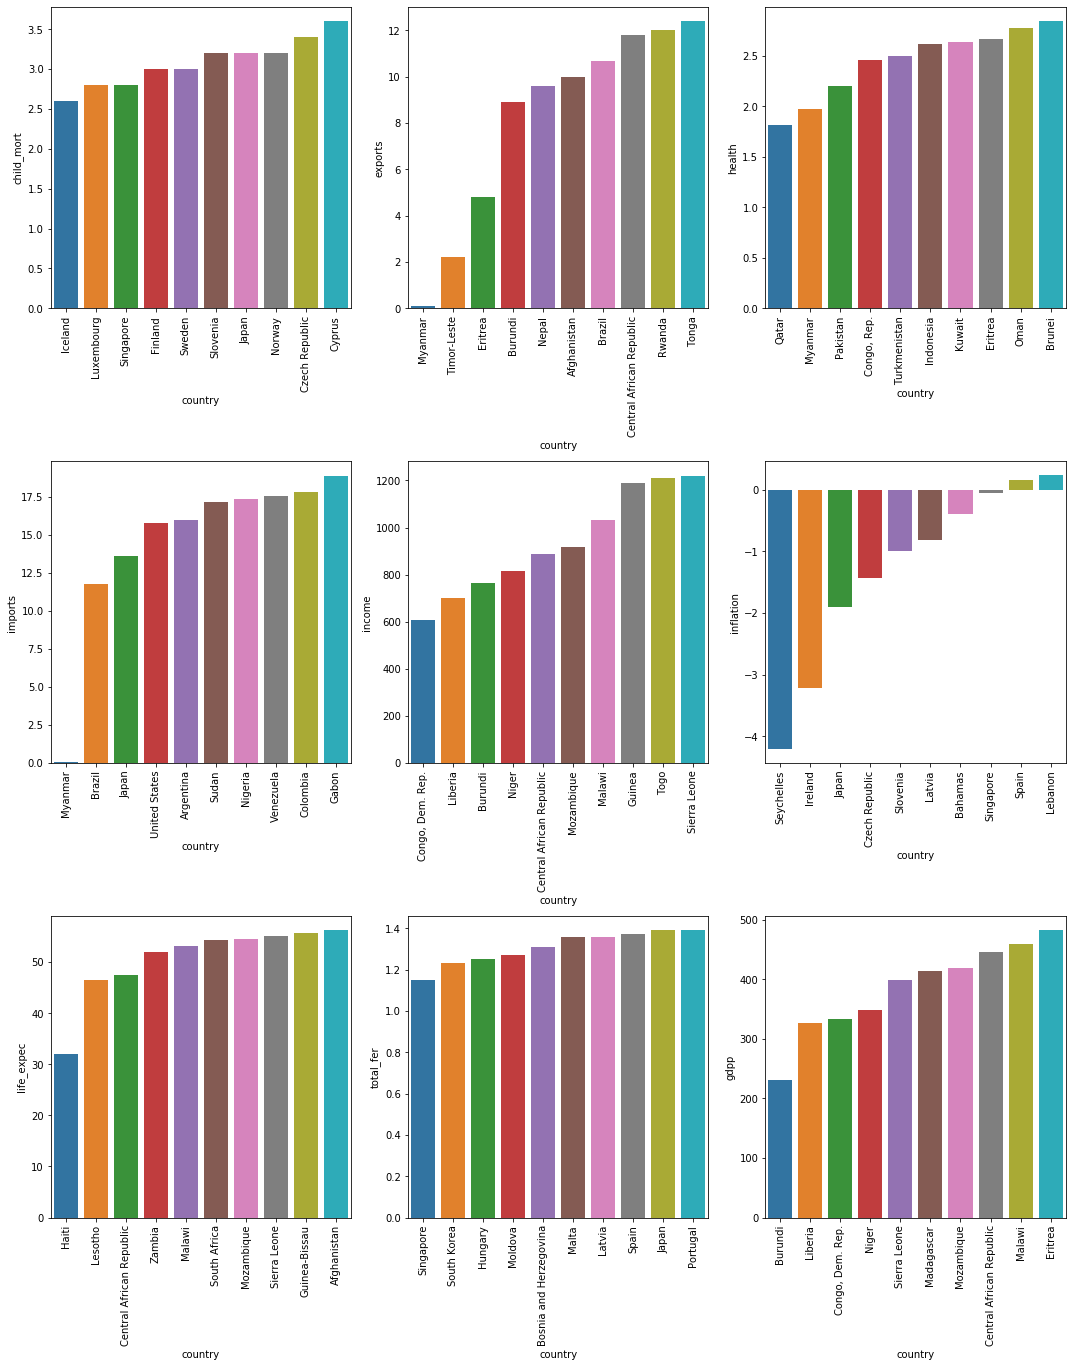

In [133]:
plt.figure(figsize=(15,55))
i=0
for val in cols:
    i = i+1
    plt.subplot(9,3,i)
    bot10 = country_data_df[['country',val]].sort_values(val, ascending = True).head(10)
    #top10 = country_data_df[['country',val]].sort_values(val, ascending = False).head(10)
    #sns.barplot(x='country', y=val, data= top10)
    sns.barplot(x='country', y=val, data= bot10)
    plt.xticks(rotation=90)
    
plt.tight_layout()

#### The countries that may concern HELP are:
* Child Mortality is highest in Haiti
* Inflation is highest in Nigeria
* Total Fer is highest in Nigeria
* Life expectency is lowest in Haiti
* GDPP is lowest in Burundi
* Income is lowest in Congo, Dem, Rep
* Lowest imports and exports are recorded for Myanman
* Quatar should take care of their Health sector

### Correlation between columns can be understood by seeing the following plot

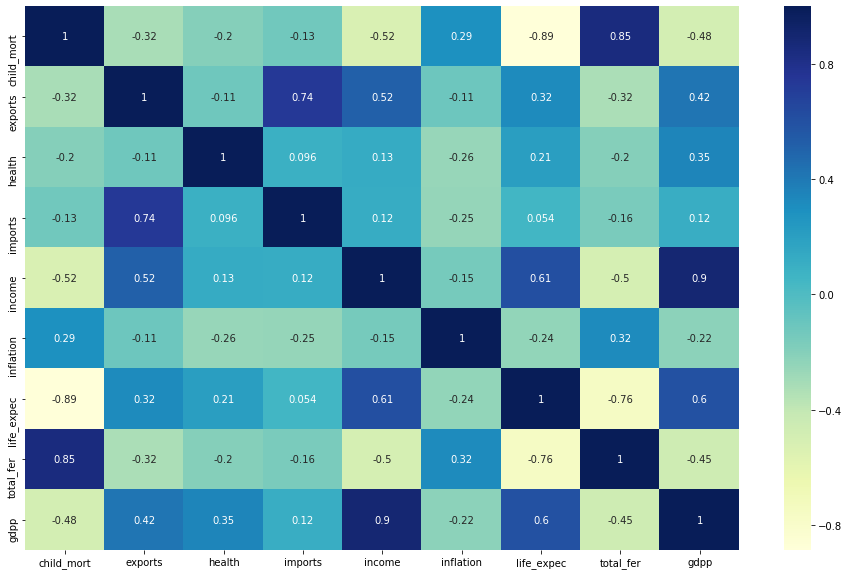

In [134]:
plt.figure(figsize = (16, 10))
sns.heatmap(country_data_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

We can see there are many correlated variable which will lead to the Multicolinearity in the model. But this will be taken care by the PCA in later steps.

## Part II: Make data right for the model
Here we will check and treat the outliers because the models are sensitive to the outliers.

The best way to see outliers is by ploting box plots. So let's do that

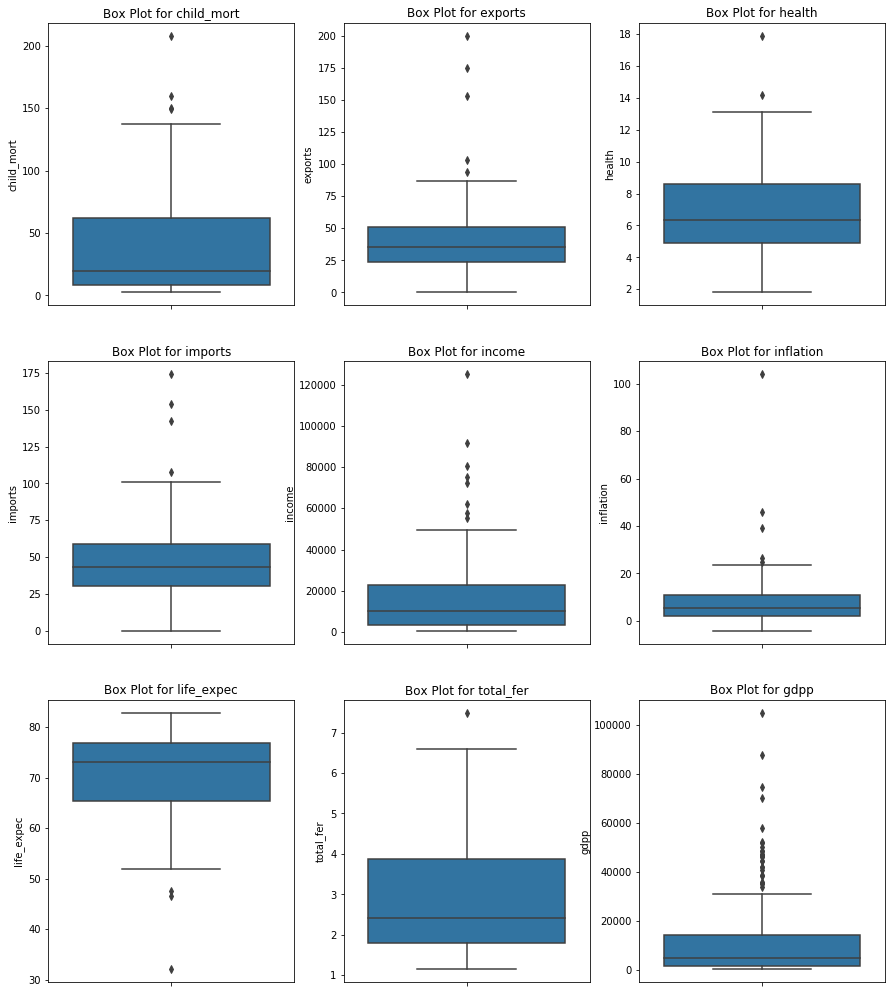

In [135]:
plt.figure(figsize=(15,55))
i = 0
for val in cols.values:
    i = i+1
    plt.subplot(9,3,i)
    plt.title('Box Plot for '+val)
    sns.boxplot(y = country_data_df[val]);

From the above plot we can clearly see there are outliers in each column. And we need to treat them

In [136]:
#We are using z score approach to removing the outliers.
from scipy import stats
countries_outliers_treated = country_data_df.copy()
countries_outliers_treated=countries_outliers_treated[(np.abs(stats.zscore(countries_outliers_treated[cols])) < 3).all(axis=1)]
countries_outliers_treated.dropna(axis=0,inplace=True)
countries_outliers_treated

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [137]:
countries_outliers_treated.reset_index().drop('index',axis=1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [138]:
#Getting country names.
countries = countries_outliers_treated.pop('country')

In [139]:
np.array(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isr

In [140]:
countries_outliers_treated.shape

(153, 9)

It means only 14 were removed from the orignal data set which is about 8% which is quite affordable.
Now let's make `countries_outliers_treated` our main data frame to work on.

In [141]:
countries_df = countries_outliers_treated.copy()
countries_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### The model is also sensitive to the scaling. So let's scale the data in this part.

In [142]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
scaled = scaler.fit_transform(countries_df)
scaled_df = pd.DataFrame(scaled)             #Since scaler returns array values, we are converting it to dataframe
scaled_df.columns = countries_df.columns
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


### Now the data is scaled and the outliers are treated. We can proceed with Clustering modeling.

### But how to know that the data is appropriate for the clustering. For that we check `Hopkins score` which tells how well the data can be clustered. More Hopkins score more defined clusters would be

In [143]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [144]:
print(round(hopkins(scaled_df)*100,2),'%')

78.26 %


#### We are getting decent Hopking test score which means we can go ahead with clustering..

## Part III: Model building and evaluation
Here we will making clusters of the data set using K-means algorithmn. But first we need to know the appropriate number of clusters. For which we will use `Elbow Curve Method` and `Silhoutte Score`

### Elbow Curve Method

In [145]:
from sklearn.cluster import KMeans

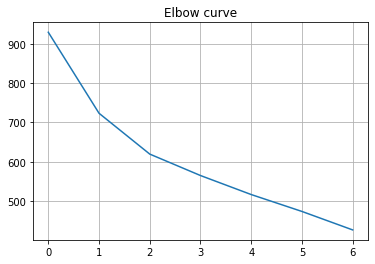

In [146]:
ssd = []                                     #It will store the kmeans.inertia for each cluster.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.title("Elbow curve")
plt.plot(ssd)
plt.grid()

Here the drop of kmeans.intertia is good for 1, 2,3 and 4 clusters. After 4 the drop is not much.

### Silhouette Score/Coefficient

In [147]:
from sklearn.metrics import silhouette_score

In [148]:
clusters_n = [2,3,4,5,6,7,8]
sse_ = []

In [149]:
for i in clusters_n:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    sse_.append(silhouette_avg)

For n_clusters=2, the silhouette score is 0.2821703661273351
For n_clusters=3, the silhouette score is 0.2754742086692089
For n_clusters=4, the silhouette score is 0.24989165629947438
For n_clusters=5, the silhouette score is 0.24810949961903667
For n_clusters=6, the silhouette score is 0.23502040949010813
For n_clusters=7, the silhouette score is 0.2619058561282088
For n_clusters=8, the silhouette score is 0.25484712046579444


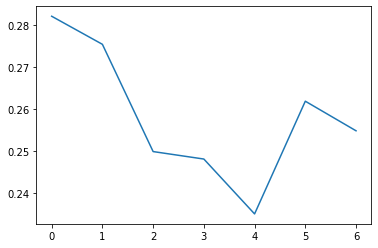

In [150]:
# Seeing Silhouette score visually.
plt.plot(sse_);

By seeing the Elbow curve and the Silhoutte scores we can say 4 or 6 clusters will be fine for this case. So we choose `k = 4` from here.

Now, let's build our model using K-means...

### Model Building using K-means with K = 4

In [151]:
kmeans_k4 = KMeans(n_clusters=4, max_iter=250, random_state=42)   #No. of clusters were found above.
kmeans_k4.fit(scaled_df)                        #Model training

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=250,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [152]:
#Let see how are the labels formed.
kmeans_k4.labels_

array([0, 1, 2, 0, 1, 2, 2, 3, 3, 2, 3, 3, 2, 1, 1, 3, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 3, 1, 3,
       2, 2, 2, 1, 0, 0, 1, 1, 3, 3, 2, 0, 1, 3, 0, 3, 1, 2, 0, 0, 1, 1,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 3, 3, 2, 0, 1,
       1, 2, 2, 1, 3, 1, 2, 0, 1, 2, 0, 1, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0,
       1, 3, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 3, 3, 2, 2, 1, 1, 2, 0])

In [153]:
### These labels can be assigned to the outlier treated dataset
countries_outliers_treated['ClusterLabel_Kmeans'] = kmeans_k4.labels_
final_k4_df = pd.concat([countries,countries_outliers_treated],axis=1).set_index('country')
final_k4_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


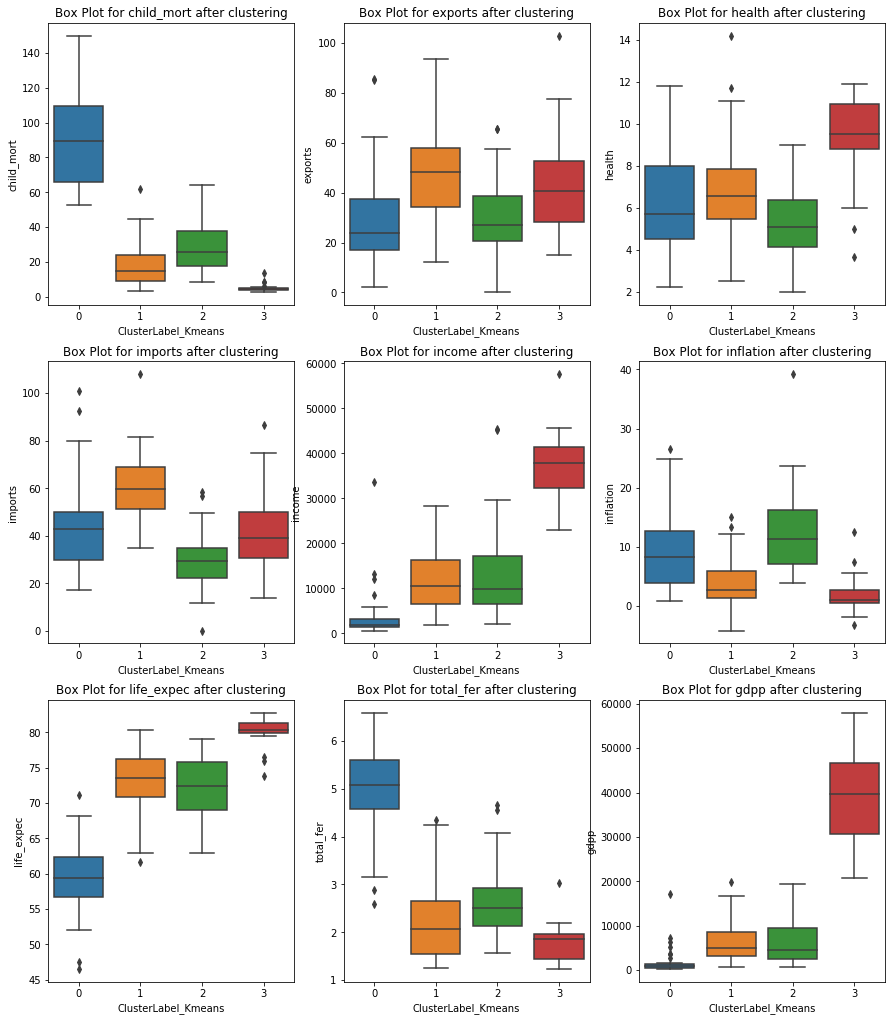

In [154]:
### We can also see how the K-means has clustered the data by plotting box-plots.
plt.figure(figsize=(15,55))
i = 0
for val in cols.values:
    i = i+1
    plt.subplot(9,3,i)
    plt.title('Box Plot for '+val+' after clustering')
    sns.boxplot(x ='ClusterLabel_Kmeans', y = val, data = final_k4_df);

### Inferences from the above plot
* On whole, the k-means has done a good job as we can see for most of the cases the boxes has different median for each cluster.
* In figure 1, we can see the child mortality rate is higher for 0 cluster followed by 2, 1 and 3.
* In figure 2, exports are more for countries in cluster 1 and 3
* In figure 3, it is clear the cluster 3 is leading in health terms followed 2, 0 and 1.
* In figure 4, imports are more for 1 countries. And we have seen the exports are also more for this.
* In figure 5, the income are high for 3 clustered countries.
* The inflation of countries 3 and 1 are very less.
* The life expectancy in countries 3 is more.
* The total fertility is very less for countries 3, this could be because of family planning education.
* The overall GDP per capita is more for category 3 country.

### Let's see few countries in each clusters

In [155]:
pd.DataFrame({"Cluster 0 countries":final_k4_df.groupby('ClusterLabel_Kmeans').get_group(0).index}).head(5)

,Cluster 0 countries
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso


In [156]:
pd.DataFrame({"Cluster 1 countries":final_k4_df.groupby('ClusterLabel_Kmeans').get_group(1).index}).head()

,Cluster 1 countries
0,Albania
1,Antigua and Barbuda
2,Barbados
3,Belarus
4,Belize


In [157]:
pd.DataFrame({"Cluster 2 countries":final_k4_df.groupby('ClusterLabel_Kmeans').get_group(2).index}).head()

,Cluster 2 countries
0,Algeria
1,Argentina
2,Armenia
3,Azerbaijan
4,Bangladesh


In [158]:
pd.DataFrame({"Cluster 3 countries":final_k4_df.groupby('ClusterLabel_Kmeans').get_group(3).index}).head()

,Cluster 3 countries
0,Australia
1,Austria
2,Bahamas
3,Bahrain
4,Belgium


We can also use Hierarchical Clustering and let's see how this method's clustering result is different from the K-means 

### Hierarchical Clustering

In [159]:
#Checking our scaled data if it is intact
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


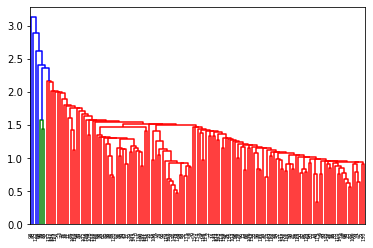

In [160]:
# In Hierarchical clustering, the data points are grouped to make clusters. To represent it we plot Dendrogram.
#Importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Single Linkage: We merge in each step the two clusters based on the smallest distance.
mergings = linkage(scaled_df,metric='euclidean',method='single')
dendrogram(mergings)
plt.show()

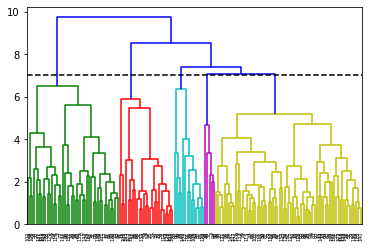

In [161]:
#Dendogram with complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.hlines(y=7, xmax=3000, xmin=0, colors="black", linestyles="--")
plt.show()

The black line at distance = 7 cuts the denodogram at 5 points which signifies number of cluster = 5.

In [162]:
#We can get labels from cut_tree funtions like below
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 0, 2, 1, 0, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 3,
       1, 1, 1, 1, 2, 0, 4, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1, 4,
       3, 1, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 0, 4, 1, 1, 1, 1, 4, 4, 3, 4,
       1, 0, 0, 4, 4, 0, 2, 1, 4, 1, 2, 1, 1, 0, 0, 1, 0, 3, 3, 3, 0, 4,
       1, 1, 1, 1, 3, 1, 0, 0, 1, 3, 0, 1, 4, 4, 1, 1, 1, 1, 3, 0, 1, 0,
       1, 3, 1, 0, 4, 0, 0, 1, 1, 1, 4, 0, 1, 3, 3, 1, 0, 1, 1, 0, 0])

In [163]:
countries_outliers_treated['ClusterLabel_Hierachical'] = cluster_labels
final_h3_df = pd.concat([countries,countries_outliers_treated],axis=1).set_index('country')
final_h3_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans,ClusterLabel_Hierachical
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,1
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,1
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,1
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,3
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,3


By looking at the dataframe above we can say the clustering has been done quite well by both k-means and Hierarchical algorithms but there are some difference as well.

Again let's plot the box plot and see if we get anything new here

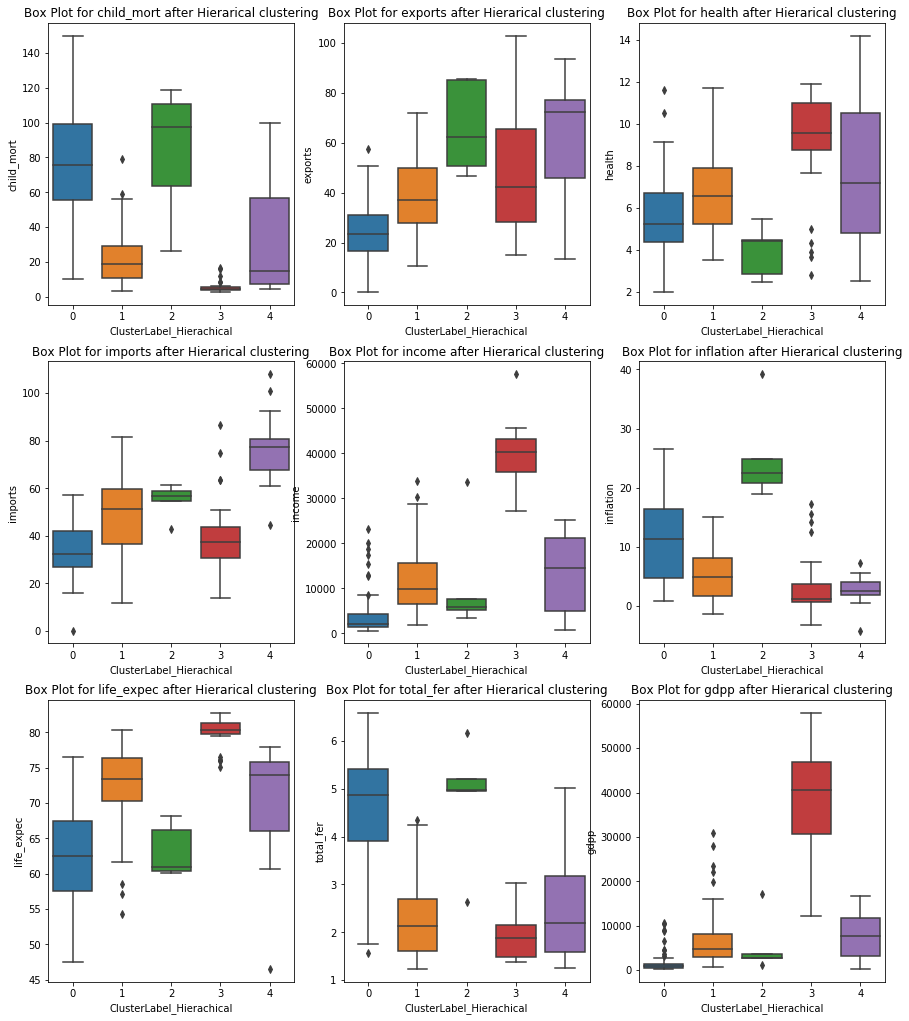

In [164]:
### We can also see how the Hierarchical clustering has clustered the data by plotting box-plots.
plt.figure(figsize=(15,55))
i = 0
for val in cols.values:
    i = i+1
    plt.subplot(9,3,i)
    plt.title('Box Plot for '+val+' after Hierarical clustering')
    sns.boxplot(x ='ClusterLabel_Hierachical', y = val, data = final_h3_df);

Clearly we can see, there are slight difference in the inferences between K-mean and Hirerachical algorithm but overall these box plots are also telling us the more or less same thing.

### Countries in each cluster after Hierachical clustering

In [165]:
pd.DataFrame({"Cluster 0 countries":final_h3_df.groupby('ClusterLabel_Hierachical').get_group(0).index}).head(5)

,Cluster 0 countries
0,Afghanistan
1,Algeria
2,Argentina
3,Benin
4,Burkina Faso


In [166]:
pd.DataFrame({"Cluster 1 countries":final_h3_df.groupby('ClusterLabel_Hierachical').get_group(1).index}).head(5)

,Cluster 1 countries
0,Albania
1,Antigua and Barbuda
2,Armenia
3,Azerbaijan
4,Bahamas


In [167]:
pd.DataFrame({"Cluster 2 countries":final_h3_df.groupby('ClusterLabel_Hierachical').get_group(2).index}).head(5)

,Cluster 2 countries
0,Angola
1,"Congo, Rep."
2,Equatorial Guinea
3,Mauritania
4,Mongolia


In [168]:
pd.DataFrame({"Cluster 3 countries":final_h3_df.groupby('ClusterLabel_Hierachical').get_group(3).index}).head(5)

,Cluster 3 countries
0,Australia
1,Austria
2,Bahrain
3,Belgium
4,Canada


In above two methods we were focusing on the number of cluster and we can see we are considering all columns to determine the clusters. Let's see the `Pricipal Component Analysis` PCA now on the same data set.

### Clustering using PCA and K-means approach

### Let's try to do PCA on the data with outliers and unscaled values

In [169]:
#importing libraries
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(country_data_df[cols])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

PCA Components for dataset with outliers

In [170]:
pca.components_

array([[-8.07327698e-04,  5.11348092e-04,  2.52724061e-05,
         1.14384869e-04,  7.26746756e-01, -7.65998651e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707964e-04, -2.15627987e-04,
         5.41883715e-05,  6.86903991e-01,  2.85616792e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25215339e-01, -2.28627282e-01, -9.25844014e-03,
        -2.42704100e-01,  1.17358496e-03,  8.73842384e-02,
        -1.55747044e-01,  2.86462224e-02,  1.16146666e-04],
       [ 3.28783999e-01,  6.52814366e-01, -7.58649598e-03,
         6.78156522e-01, -4.12812338e-04, -2.19844970e-02,
        -7.23212922e-02,  8.16973465e-03,  2.44967157e-04],
       [-3.94786565e-02,  5.94987240e-01, -7.77516009e-02,
        -5.29179120e-01, -6.84017169e-04,  5.95872597e-01,
         5.69356462e-02,  7.02425075e-03,  3.74367532e-04],
       [-6.08330796e-02, -4.01990656e-01,  5.54312529e-02,
         4.41412073e-01,  1.95004065e-04,  7.978499

Variance Ration for data without outlier treatement

In [171]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

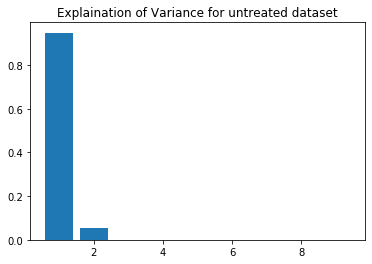

In [172]:
plt.title('Explaination of Variance for untreated dataset');
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_);

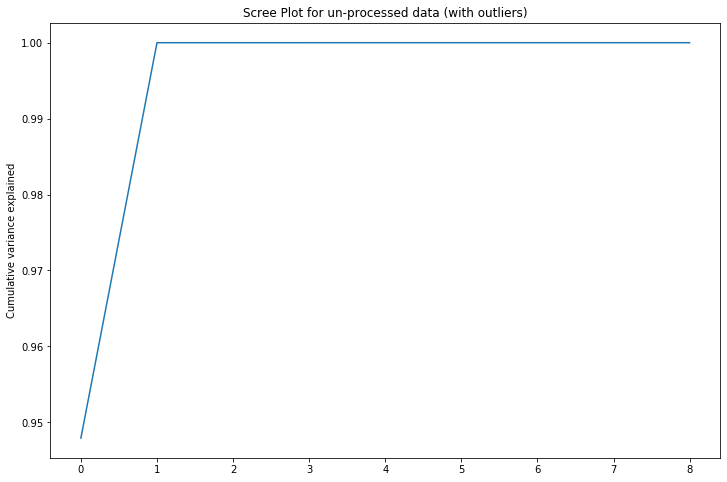

In [173]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
#plt.vlines(x=4, ymax=1, ymin=0.4, colors="b", linestyles="--")
#plt.hlines(y=0.94740499, xmax=8, xmin=0, colors="y", linestyles="--")

#plt.vlines(x=5, ymax=1, ymin=0.4, colors="r", linestyles="--")
#plt.hlines(y=0.96825437, xmax=8, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)
plt.title("Scree Plot for un-processed data (with outliers)")
plt.ylabel("Cumulative variance explained")
plt.show()

Because of not treating outliers and not scaling, this scree plot is telling that 99% of data points can be shown by just 1 cluster. Which is not an information for us since the variation of data is not being distributed among the different clusters.

In [174]:
#checking the scaled data frame for which we have already treated the outliers
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


In [175]:
#importing libraries
from sklearn.decomposition import PCA

In [176]:
pca = PCA(random_state=42)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components of PCA for treated dataset

In [177]:
pca.components_

array([[-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
        -0.22650995,  0.42715413, -0.40550525,  0.39482635],
       [ 0.03459073,  0.6327697 , -0.12933969,  0.7257587 , -0.07067406,
        -0.06317055, -0.14387869,  0.01853034, -0.15786626],
       [ 0.18299915, -0.25554275,  0.66457406,  0.25152297, -0.12332053,
        -0.5567656 , -0.18244321,  0.17127257,  0.09203817],
       [ 0.34760292,  0.26667437,  0.15444884, -0.08860929,  0.45993894,
         0.30990123, -0.19006785,  0.42255347,  0.50407451],
       [-0.22366393, -0.08811952,  0.57689406,  0.2178802 , -0.13508527,
         0.71277143,  0.05368612, -0.0894036 , -0.15736745],
       [ 0.05354957,  0.29421054,  0.19869989, -0.3552151 ,  0.04942437,
        -0.03553489, -0.63615054, -0.57141714, -0.10001314],
       [ 0.00091456, -0.56038917, -0.29999471,  0.46315184,  0.24684036,
         0.13004423, -0.37448883, -0.29824888,  0.27280168],
       [-0.77430348,  0.00447314, -0.03962214, -0.07430007,  0

#### Before going further let's plot the PCAs and try to get some information from it.
We will plot first 2 PCAs as axes

In [178]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':cols})
pcs_df

,PC1,PC2,Feature
0,-0.423220,0.034591,child_mort
1,0.203604,0.632770,exports
2,0.217542,-0.129340,health
3,0.082910,0.725759,imports
4,0.413693,-0.070674,income
5,-0.226510,-0.063171,inflation
6,0.427154,-0.143879,life_expec
7,-0.405505,0.018530,total_fer
8,0.394826,-0.157866,gdpp


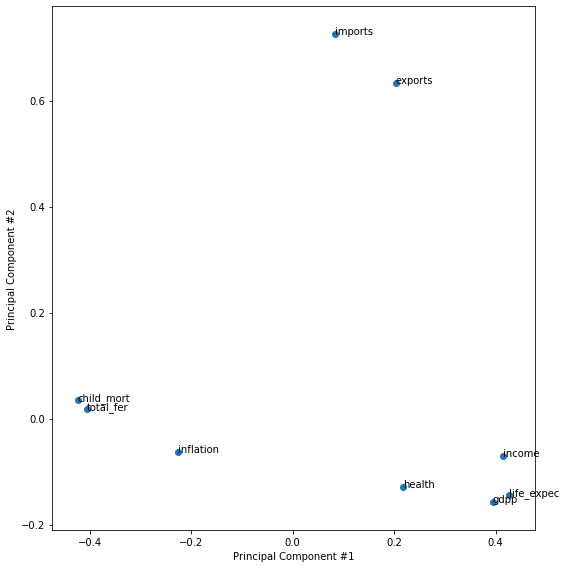

In [179]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

So now we can assume how these 8 columns are explained by PCs.

Let's check the `explained variance ratio` of each component

In [180]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

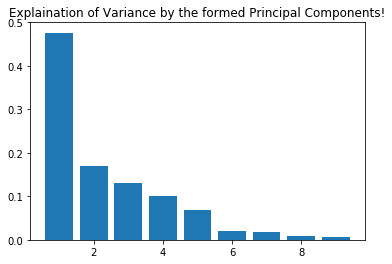

In [181]:
#Plotting the explained variance ratio
plt.title('Explaination of Variance by the formed Principal Components!');
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_);

Here, we can see the variance of the data set is being distributed among various clusters.

### Scree plot for the explained variance

Scree plot is very usefull in knowing the number of clusters required of the required variation

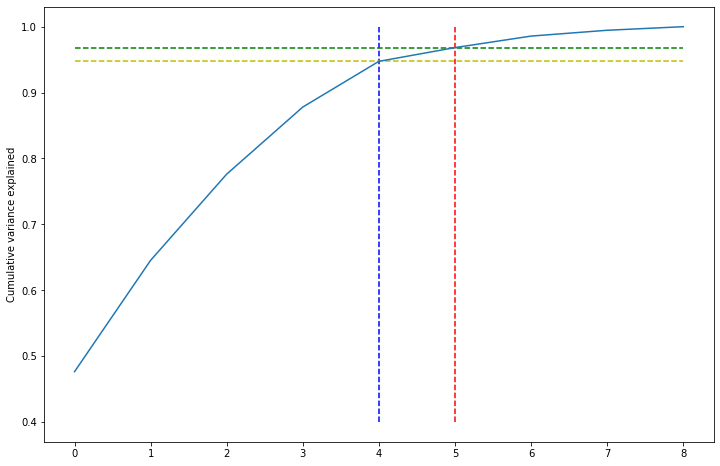

In [182]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0.4, colors="b", linestyles="--")
plt.hlines(y=0.94740499, xmax=8, xmin=0, colors="y", linestyles="--")

plt.vlines(x=5, ymax=1, ymin=0.4, colors="r", linestyles="--")
plt.hlines(y=0.96825437, xmax=8, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [183]:
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

Here we can see for 4 PCA components are explaining 95% of data whereas 5 components are explaining 96% of the data. So we perform PCA on 4 components first.

In [184]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
countries_pca4 = pca_final.fit_transform(scaled_df)

In [185]:
countries_pca4.shape

(153, 4)

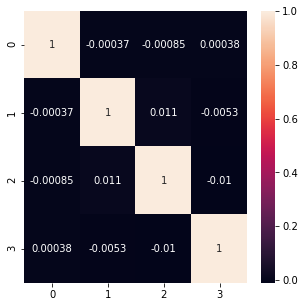

In [186]:
#Let's see the correlation among the PCs
corrmat = np.corrcoef(countries_pca4.transpose())
plt.figure(figsize=[5,5])
sns.heatmap(corrmat, annot=True)

It clearly shows that there are no or neligible correation between any PCs

Now these PCs will act as the attributes for clusterings. First let's make dataframe of it.

In [187]:
countries_pca4_df = pd.DataFrame(countries_pca4, columns=["PC1", "PC2","PC3","PC4"])
countries_pca4_df['country'] = np.array(countries)
countries_pca4_df=countries_pca4_df.set_index('country')
countries_pca4_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-3.129112,-0.530438,1.326366,0.592673
Albania,0.552498,-0.242770,-0.157737,-1.362826
Algeria,-0.357008,-0.461483,-1.876976,-0.109599
Angola,-3.456355,1.213750,-1.381585,2.217845
Antigua and Barbuda,1.308078,0.615244,-0.031004,-0.713291


### Since we need to assign these data points to a cluster, we will use K-means with PCA

In [188]:
#These will be similar steps that we have done in above steps.
pca_kmeans4 = KMeans(n_clusters=4,random_state=42)
pca_kmeans4.fit(countries_pca4_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [189]:
#Getting labels generated by the algorithmn
pca_kmeans4.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 3, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1])

In [190]:
countries_outliers_treated['ClusterLabel_KmeanPCA'] = pca_kmeans4.labels_
final_pca4_df = pd.concat([countries,countries_outliers_treated],axis=1).set_index('country')
final_pca4_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans,ClusterLabel_Hierachical,ClusterLabel_KmeanPCA
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,1
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,1,3
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,2,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,1,3
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,0,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,1,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,3,2
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,3,2


In [191]:
#Let see the distribution for 5 clusters as well using K means.
pca_kmeans5 = KMeans(n_clusters=5,random_state=42)
pca_kmeans5.fit(countries_pca4_df)
countries_outliers_treated['ClusterLabel_KmeanPCA(K=5)'] = pca_kmeans5.labels_
final_pca5_df = pd.concat([countries,countries_outliers_treated],axis=1).set_index('country')
final_pca5_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans,ClusterLabel_Hierachical,ClusterLabel_KmeanPCA,ClusterLabel_KmeanPCA(K=5)
country,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,1,2
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,1,3,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0,0,1
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,2,1,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,1,3,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,0,0,1
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,1,0,1
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,3,2,3
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,3,2,3


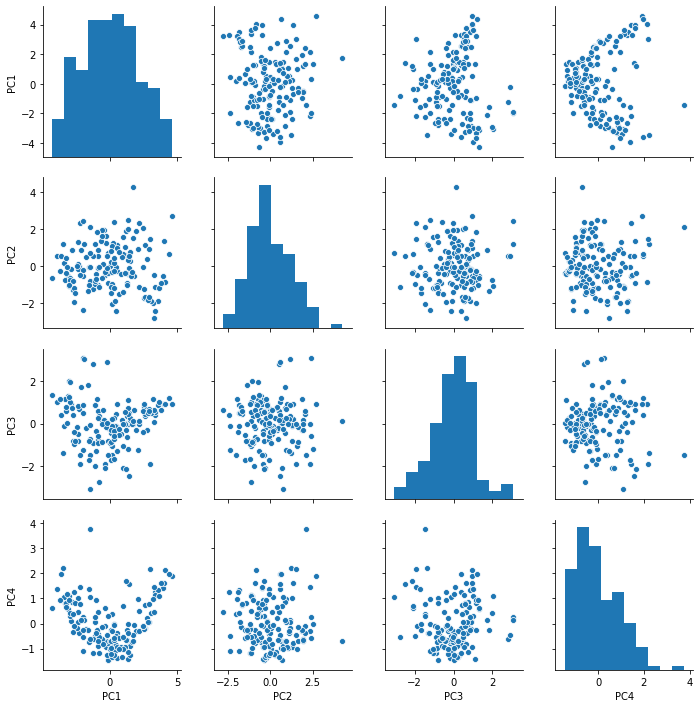

In [192]:
#Let's check the pair plot of the PCs as well.
sns.pairplot(countries_pca4_df)

## We will also do Hierarchical Clustering on PCs

In [193]:
#Checking our PCA dataframe
countries_pca4_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-3.129112,-0.530438,1.326366,0.592673
Albania,0.552498,-0.242770,-0.157737,-1.362826
Algeria,-0.357008,-0.461483,-1.876976,-0.109599
Angola,-3.456355,1.213750,-1.381585,2.217845
Antigua and Barbuda,1.308078,0.615244,-0.031004,-0.713291


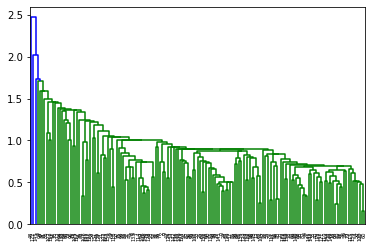

In [194]:
#As we have done Hierarchical clustering above, we will repeat in similar fashion
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Single Linkage: We merge in each step the two clusters based on the smallest distance.
mergings = linkage(countries_pca4_df,metric='euclidean',method='single')
dendrogram(mergings)
plt.show()

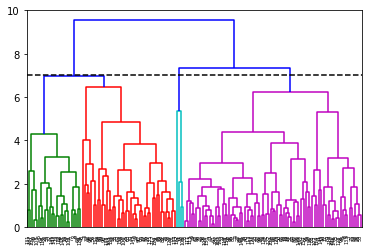

In [195]:
#Dendogram with complete linkage
mergings = linkage(countries_pca4_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.hlines(y=7, xmax=3000, xmin=0, colors="black", linestyles="--")
plt.show()

In [196]:
# For 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 3, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 1, 2, 1, 2,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0])

In [197]:
countries_outliers_treated['ClusterLabel_Hierachical_PCA'] = cluster_labels
final_PCAh4_df = pd.concat([countries,countries_outliers_treated],axis=1).set_index('country')
final_PCAh4_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans,ClusterLabel_Hierachical,ClusterLabel_KmeanPCA,ClusterLabel_KmeanPCA(K=5),ClusterLabel_Hierachical_PCA
country,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1,2,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,3,0,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0,1,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2,1,2,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,3,0,1


In [198]:
#Now let's make a final dataframe that contains all custering labels and PCs

In [199]:
final_df = countries_pca4_df.join(final_PCAh4_df, how='inner')
final_df.head()

,PC1,PC2,PC3,PC4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterLabel_Kmeans,ClusterLabel_Hierachical,ClusterLabel_KmeanPCA,ClusterLabel_KmeanPCA(K=5),ClusterLabel_Hierachical_PCA
country,,,,,,,,,,,,,,,,,,
Afghanistan,-3.129112,-0.530438,1.326366,0.592673,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1,2,0
Albania,0.552498,-0.242770,-0.157737,-1.362826,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,3,0,1
Algeria,-0.357008,-0.461483,-1.876976,-0.109599,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0,1,2
Angola,-3.456355,1.213750,-1.381585,2.217845,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2,1,2,0
Antigua and Barbuda,1.308078,0.615244,-0.031004,-0.713291,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,3,0,1


## Now we see the how clustering visually. On plot

### 1. Clustering done K-means using PCA

C:\Users\chand\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


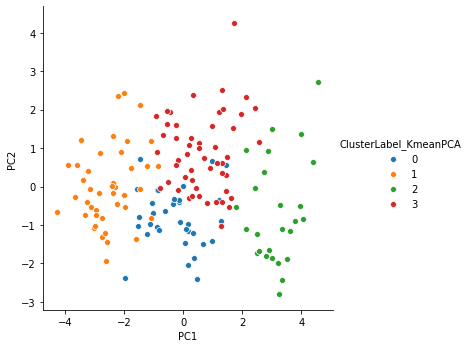

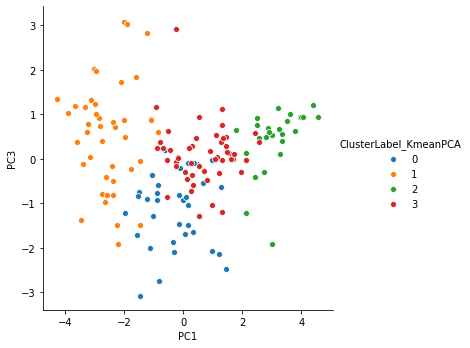

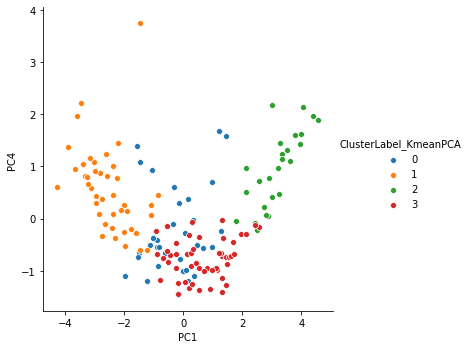

In [200]:
pcs = ["PC2","PC3","PC4"]
for pc in pcs:   
    sns.pairplot(data=final_df, x_vars=["PC1"], y_vars=[pc], hue = "ClusterLabel_KmeanPCA", size=5);

### 2. Clustering done Hierachical using PCA

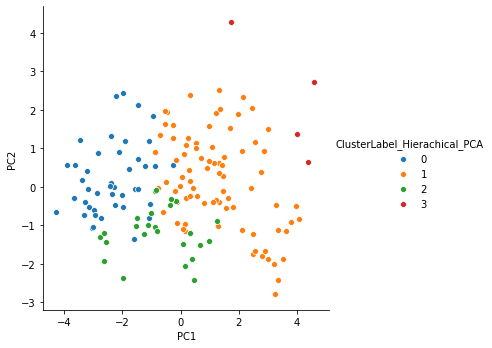

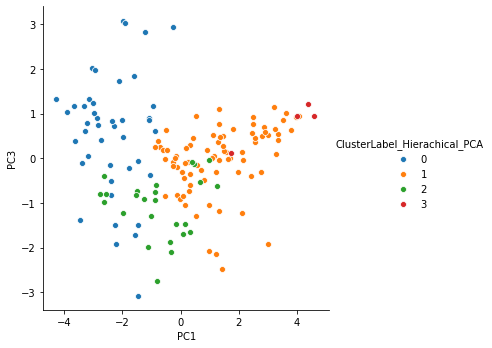

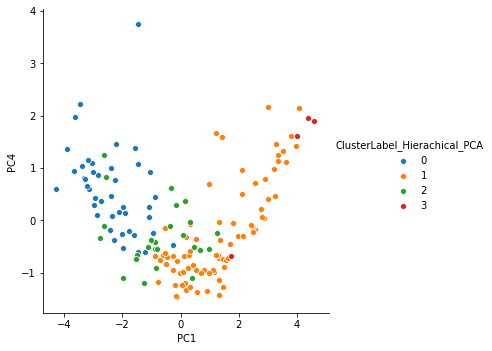

In [201]:
pcs = ["PC2","PC3","PC4"]
for pc in pcs:
    sns.pairplot(data=final_df, x_vars=["PC1"], y_vars=[pc], hue = "ClusterLabel_Hierachical_PCA", size=5)

### 3. Clustering done using K-means

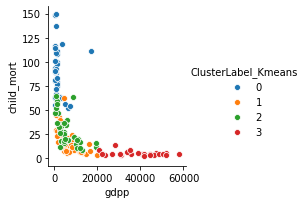

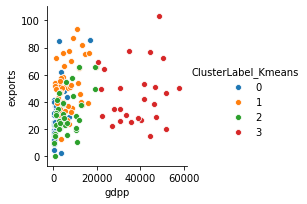

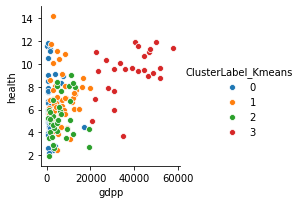

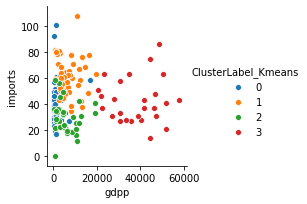

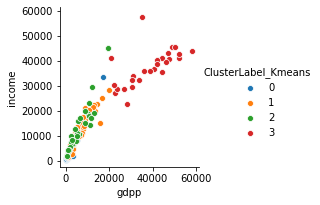

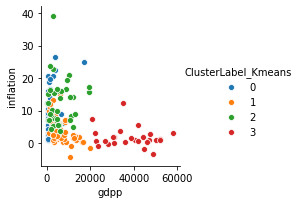

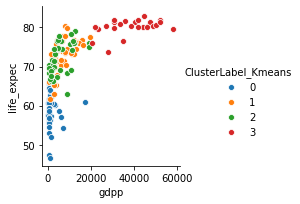

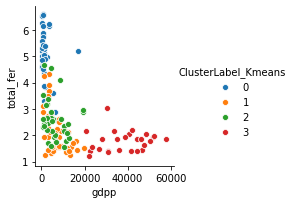

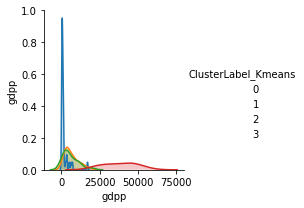

In [202]:
for col in cols:
    sns.pairplot(data=final_df, x_vars=['gdpp'], y_vars=col, hue = "ClusterLabel_Kmeans", size=3)

### 4. Clustering using Hierachical

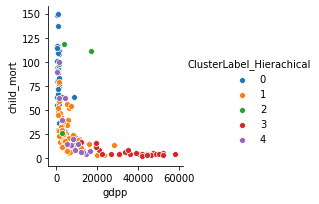

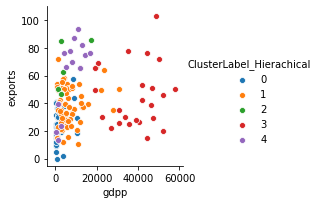

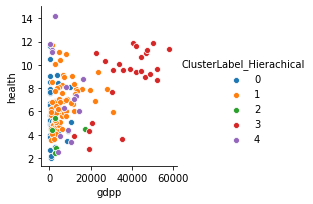

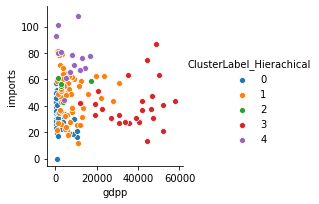

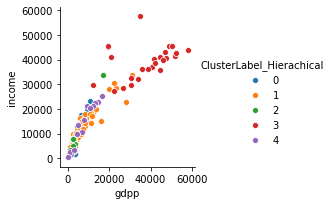

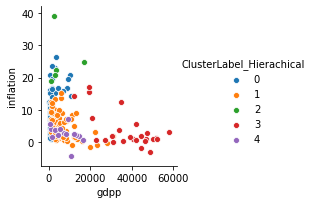

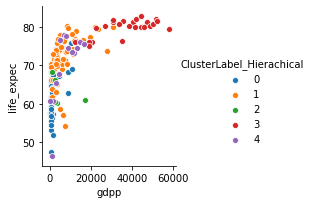

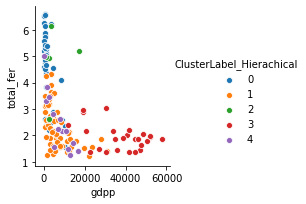

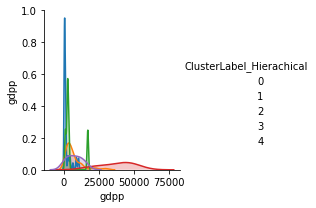

In [203]:
for col in cols:
    sns.pairplot(data=final_df, x_vars=['gdpp'], y_vars=col, hue = "ClusterLabel_Hierachical", size=3)

### Please note that, to make recommentations we are using `ClusterLabel_Kmeans`

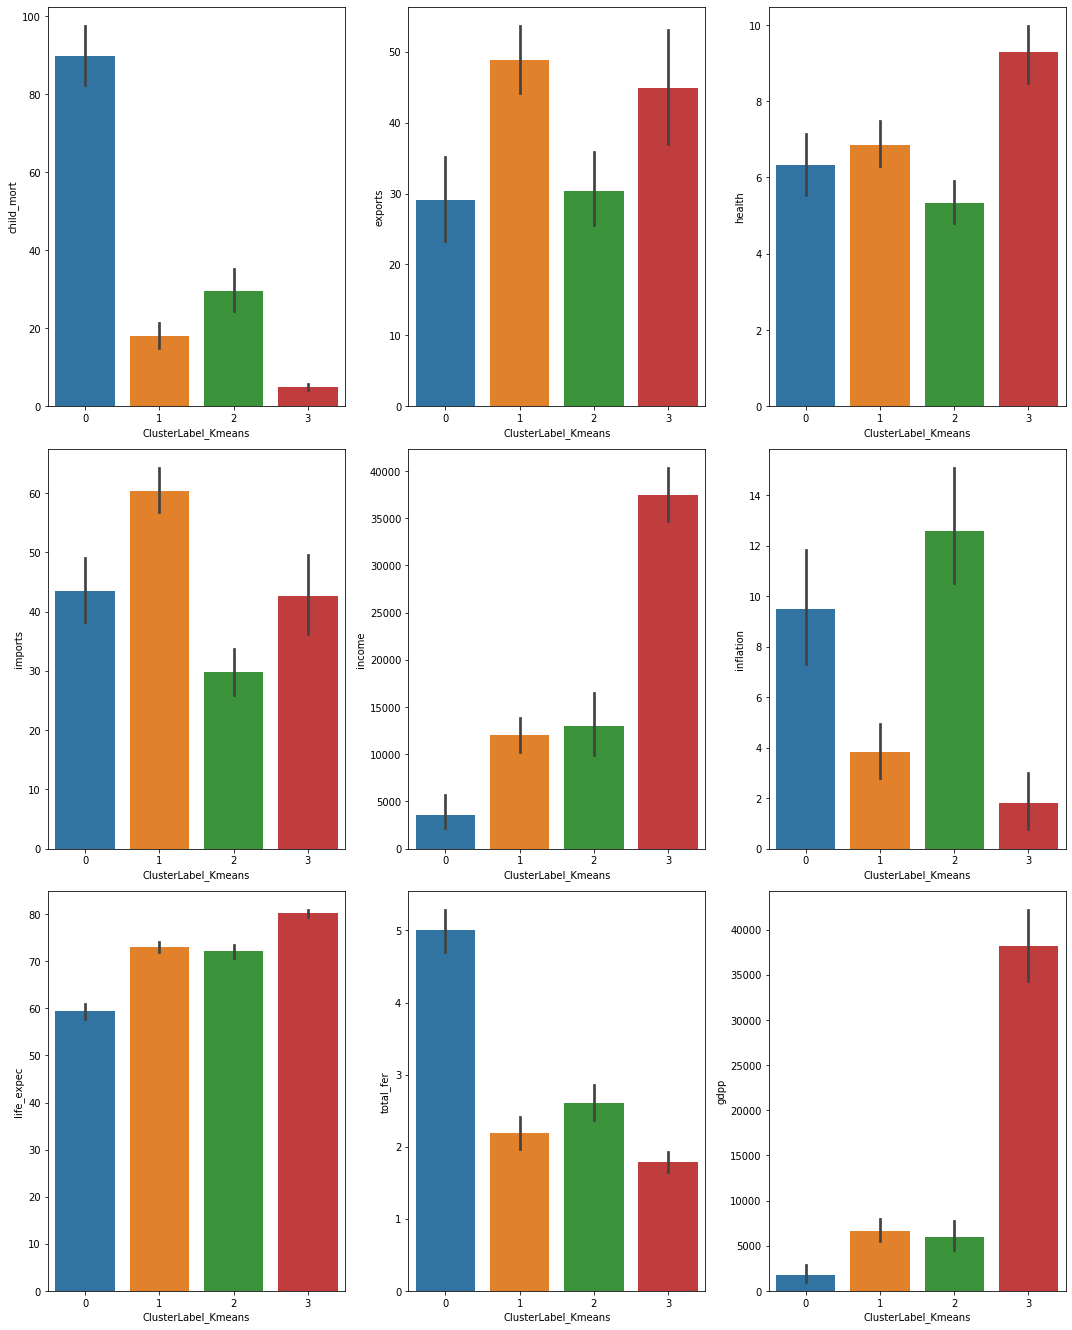

In [204]:
from numpy import mean
### We can also see how the Hierarchical clustering has clustered the data by plotting box-plots.
plt.figure(figsize=(15,55))
i = 0
for val in cols.values:
    i = i+1
    plt.subplot(9,3,i)
    sns.barplot(x ='ClusterLabel_Kmeans', y = val, data = final_df,estimator=mean);
plt.tight_layout()

Here we can see the countries in 0 cluster needs help from HELP organization because it has high `child mortality`, low `export` and `import`, low `income` `gdpp` and `life expectency` it means these countries are socio-economical backward countries.

### Countries in 0 cluster are backward and needs special attention

In [205]:
pd.DataFrame({'Countries to consider':final_df[final_df.ClusterLabel_Kmeans == 0].index})

,Countries to consider
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


## Let's wrap up
We will revisit what we have done so far.

1. Knowing our data
2. Checked if there are some missing data or null values.
3. Done some basic EDA to know more about our data. We have checked the top 10 and bottom 10 countries in each criteria.
4. Treated Outliers and scaled as models are sensitive to them.
5. Check Hopkins and Sillhoute score to know if the data is fine for clustering or not
6. Done K-means and Hierachical Cluster without PCA.
7. PCA on data
8. Fun exercise PCA on non-treated data was also done.
9. K-means (for k=4 and k=5) and Hierachical on PCs and made a final dataframe that contains all clusters labels
10. Plotting the clusters and checking the countries that need help.

## Part IV: Recommendations

#### According to our analysis we can conclude the following finding:
* Child Mortality is highest in Haiti
* Inflation is highest in Nigeria
* Total Fer is highest in Nigeria
* Life expectancy is lowest in Haiti
* GDPP is lowest in Burundi
* Income is lowest in Congo, Dem, Rep
* Lowest imports and exports are recorded for Myanmar
* Qatar should take care of their Health sector

#### And these are the countries on which HELP should concentrate more:

`Afghanistan`, `Angola`, `Benin`, `Botswana`, `Burkina Faso`, `Burundi`,`Cameroon`, `Central African Republic`, `Chad`, `Comoros`,`Congo, Dem. Rep.`, `Congo, Rep.`, `Cote dIvoire`, `Equatorial Guinea`,`Eritrea`, `Gambia`, `Ghana`, `Guinea`, `Guinea-Bissau`, `Kenya`,`Kiribati`, `Lao`, `Lesotho`, `Liberia`, `Madagascar`, `Malawi`, `Mali`,`Mauritania`, `Mozambique`, `Namibia`,`Pakistan`, `Rwanda`, `Senegal`,`South Africa`, `Sudan`, `Tanzania`,`Timor-Leste`,`Togo`, `Uganda` and `Zambia`


### Here are 5 top Countries with high Child Mortality

In [206]:
list(final_df.sort_values(['child_mort'],ascending=False).index[:4])

['Chad', 'Central African Republic', 'Mali', 'Angola']

### Here are 5 top Countries with high GDP per capita

In [207]:
list(final_df.sort_values(['gdpp'],ascending=False).index[:4])

['Denmark', 'Sweden', 'Australia', 'Netherlands']

### Here are 5 top Countries with high Income

In [208]:
list(final_df.sort_values(['income'],ascending=False).index[:4])

['United Arab Emirates', 'Ireland', 'Netherlands', 'Saudi Arabia']